# Caso Práctico con Regresión Logística

## Detección de transacciones bancarias fraudulentas con tarjetas de crédito

### Descripción del conjunto de datos:
El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares europeos. En este conjunto, se registran transacciones que tuvieron lugar en dos días, con 492 casos de fraude de un total de 284,807 transacciones, lo que genera un desbalance significativo, ya que la clase positiva (fraudes) representa solo el 0.172% de todas las transacciones. Las variables de entrada son exclusivamente numéricas, resultado de una transformación PCA. Por razones de confidencialidad, no se pueden proporcionar las características originales ni más información de fondo sobre los datos. Las características V1 a V28 son los componentes principales; las únicas características que no han sido transformadas con PCA son 'Time' y 'Amount'. La característica 'Time' representa los segundos transcurridos entre cada transacción y la primera en el conjunto de datos, mientras que 'Amount' es el monto de la transacción. La variable 'Class' es la variable a predecir, tomando el valor 1 en caso de fraude y 0 en caso contrario.

### Fuente del fichero de datos:
Los datos fueron extraídos de https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/download?datasetVersionNumber=3

## Librerías utilizadas

In [336]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter("ignore")
%matplotlib inline
#from collections import Counter
#from sklearn import metrics


## 1. Lectura del conjunto de datos

Se utiliza la librería pandas para importar los datos en formato "csv"

In [337]:
df = pd.read_csv("dataset/creditcard.csv")

## 2. Comprensión del conjunto de datos

### 2.1. Vista preliminar

In [338]:
df.head(8)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0


### 2.2. Primeras nociones

##### Características y registros

In [339]:
print("Número de variables predictoras:", len(df.columns))
print("Cantidad de registros:", len(df))

Número de variables predictoras: 31
Cantidad de registros: 284807


##### Casos positivos de fraude

In [340]:
print("Cantidad de registros de fraude positivo:", df['Class'].value_counts().get(1))
print("Tasa de fraude:", df["Class"].mean())

Cantidad de registros de fraude positivo: 492
Tasa de fraude: 0.001727485630620034


##### Tipo de datos de las variables predictoras

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##### Análisis de valores perdidos

Ninguna de las variables contiene valores perdidos, nulos o infinitos.

In [342]:
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

##### Análisis descriptivo del DataFrame

In [343]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


##### Representación gráfica de cada característica con la variable dependiente

En la gráfica anterior............


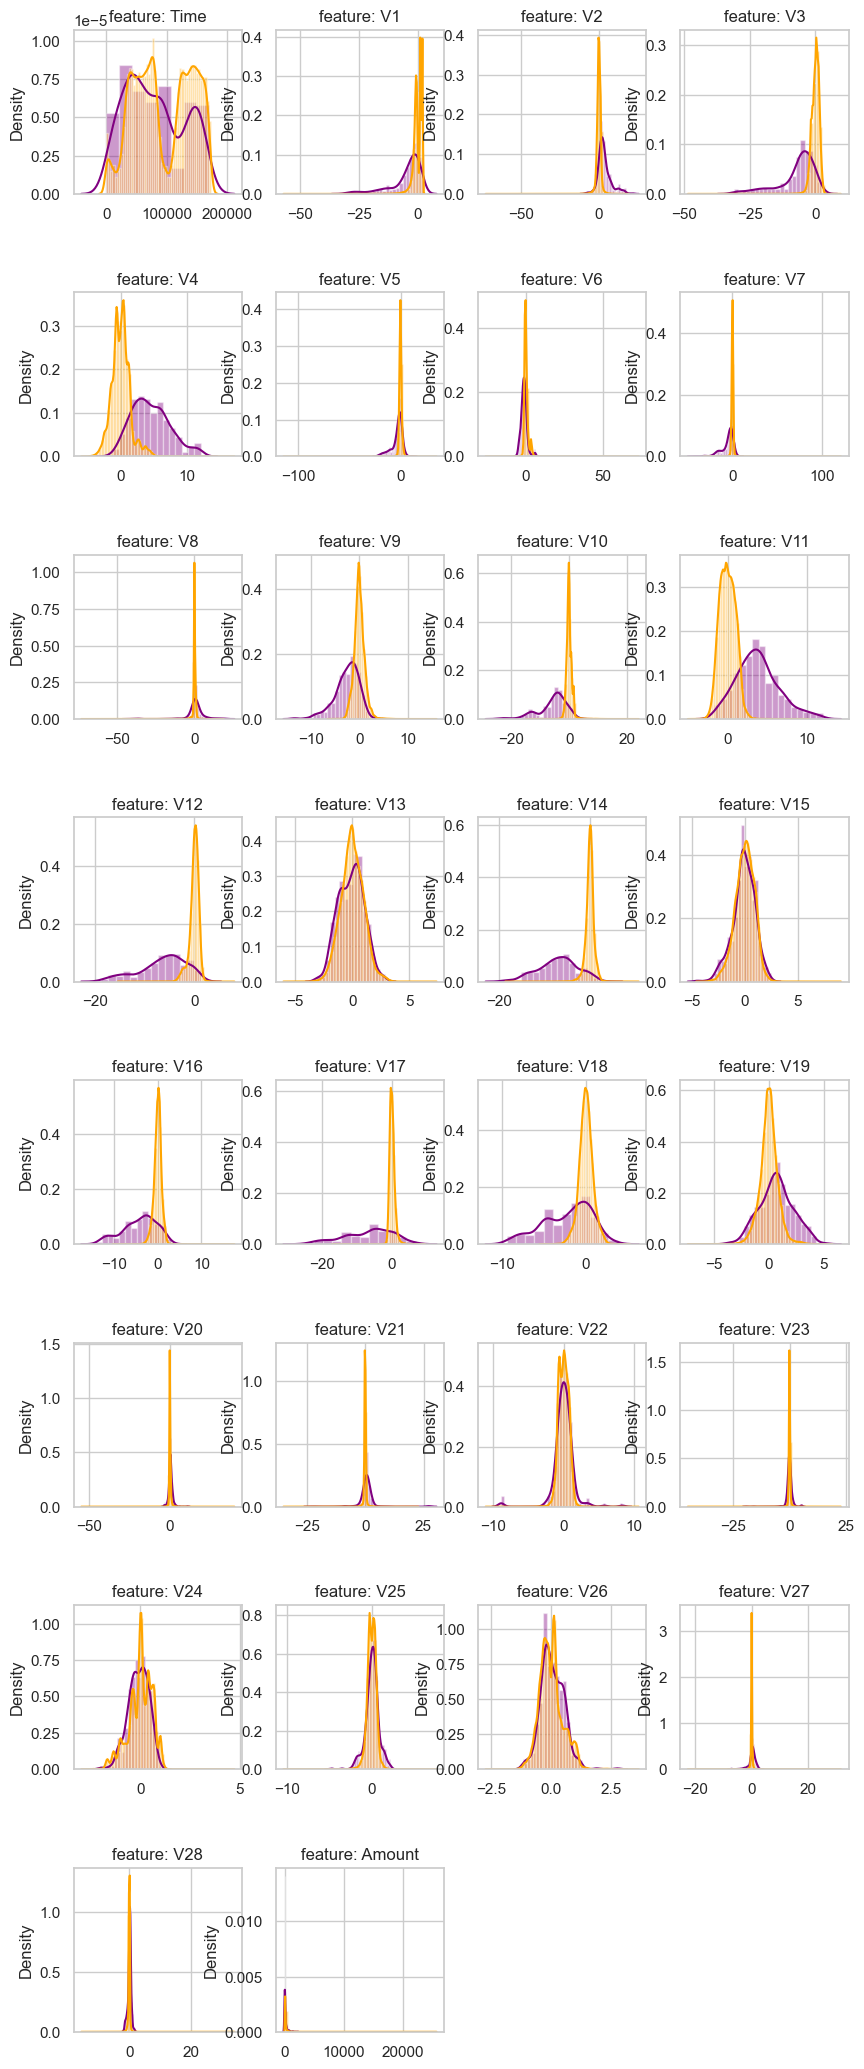

In [344]:
features = df.drop("Class", axis=1)

plt.figure(figsize=(10,26))
gs = gridspec.GridSpec(8, 4)
gs.update(hspace=0.6)

for i, f in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(df[f][df["Class"] == 1], color="purple")
    sns.distplot(df[f][df["Class"] == 0], color="orange", )
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(f))

plt.show()

## 3. Preparación del conjunto de datos

Para este tipo de algoritmos es importante que todos los datos se encuentren en un rango similar, por lo tanto, podemos aplicar una función de escalado o normalización. Otra opción, es eliminar las características que no se encuentran en un rango similar siempre y cuando no sean muy influyentes para la predicción.

In [345]:
# Separación de variables predictoras de la variable dependiente
X = df.drop(["Time", "Amount", "Class"], axis=1)
y = df["Class"].copy()

Para el entrenamiento es asignado el 70% de los registros, dejando restante para la instancia de validación.

In [346]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024, stratify=y)

En esta división se exige mantener la tasa de transacciones fraudulentas a través del parámetro 'stratify'.

In [347]:
print("Tasa de fraude en el conjunto de entrenamiento:", round(y_train.mean(), 5))
print("Tasa de fraude en el conjunto de prueba:", round(y_test.mean(), 5))

Tasa de fraude en el conjunto de entrenamiento: 0.00173
Tasa de fraude en el conjunto de prueba: 0.00173


## 4. Generación del modelo

### 4.1. Primer modelo con todas las variables predictoras

Para una rápida comprensión del modelo a generar, se entrena la regresión logística con todas las variables del dataset.

In [348]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [349]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

### --------------------------------- Model accuracy

In [350]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.89      0.66      0.76       344

    accuracy                           1.00    199364
   macro avg       0.95      0.83      0.88    199364
weighted avg       1.00      1.00      1.00    199364



In [351]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.57      0.68       148

    accuracy                           1.00     85443
   macro avg       0.92      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443



### Precisión

In [352]:
from sklearn.metrics import precision_score

print("Precisión de train:", precision_score(y_train, y_train_pred))
print("Precisión de test:", precision_score(y_test, y_test_pred))

Precisión de train: 0.8937007874015748
Precisión de test: 0.8333333333333334


### Recall

In [353]:
from sklearn.metrics import recall_score

print("Recall de train:", recall_score(y_train, y_train_pred))
print("Recall de test:", recall_score(y_test, y_test_pred))

Recall de train: 0.6598837209302325
Recall de test: 0.5743243243243243


### F1 Score

In [354]:
from sklearn.metrics import f1_score

print("F1 score de train:", f1_score(y_train, y_train_pred))
print("F1 score de test:", f1_score(y_test, y_test_pred))

F1 score de train: 0.7591973244147157
F1 score de test: 0.68


### Matriz de Confusión

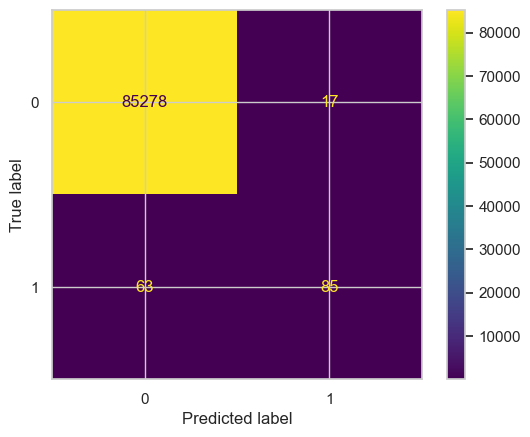

In [355]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

In [356]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Curva ROC

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


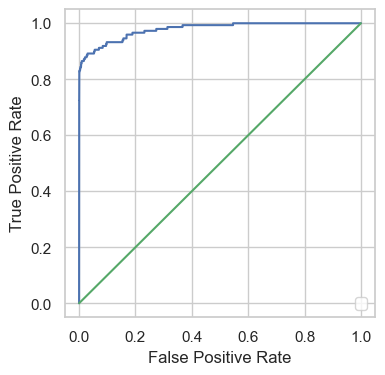

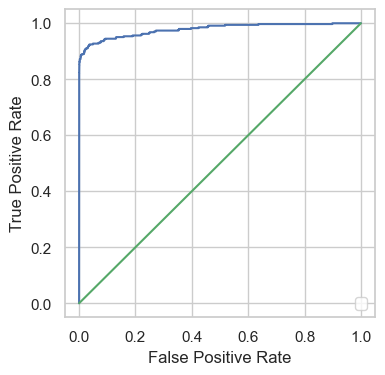

In [357]:
y_test_prob = clf.predict_proba(X_test)
y_train_prob = clf.predict_proba(X_train)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(4,4)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_test, y_test_prob[:, 1])
plot_auc_roc_curve(y_train, y_train_prob[:, 1])
plt.show()
# Plots the ROC curve using the sklearn methods - Bad plot
#plot_sklearn_roc_curve(y_test, y_pred)

## 5. Reducción de número de variables predictoras

In [358]:
# Separación de variables predictoras de la variable dependiente
X = df.drop(["Time", "Amount", "Class"], axis=1)
y = df["Class"].copy()

In [359]:
# Utilizamos Random Forest para realizar selección de características
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(n_estimators=60, random_state=2024, n_jobs=-1)
clf_rnd.fit(X, y)

RandomForestClassifier(n_estimators=60, n_jobs=-1, random_state=2024)

In [360]:
# Seleccionamos las características más importantes
feature_importances = {name: score for name, score in zip(list(X), clf_rnd.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted

V17    0.147461
V12    0.142612
V14    0.140199
V16    0.085004
V11    0.072710
V10    0.066138
V9     0.038616
V7     0.027920
V26    0.025349
V4     0.024343
V18    0.022663
V21    0.017332
V1     0.015058
V19    0.014692
V3     0.014421
V27    0.013334
V6     0.013281
V20    0.013160
V28    0.012242
V22    0.012128
V5     0.011802
V2     0.011706
V15    0.011307
V13    0.010342
V24    0.010328
V25    0.009208
V8     0.008525
V23    0.008120
dtype: float64

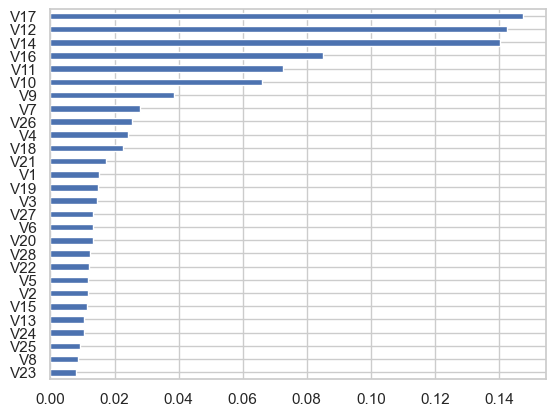

In [361]:
sns.set(style="whitegrid")
feat_importances = pd.Series(feature_importances)
feat_importances.sort_values(ascending=True).plot(kind='barh')
plt.show()

In [362]:
# Reducimos el conjunto de datos a las 8 características más importantes
X_reduced = X[list(feature_importances_sorted.head(8).index)].copy()

In [363]:
X_reduced

,V17,V12,V14,V16,V11,V10,V9,V7
0,0.207971,-0.617801,-0.311169,-0.470401,-0.551600,0.090794,0.363787,0.239599
1,-0.114805,1.065235,-0.143772,0.463917,1.612727,-0.166974,-0.255425,-0.078803
2,1.109969,0.066084,-0.165946,-2.890083,0.624501,0.207643,-1.514654,0.791461
3,-0.684093,0.178228,-0.287924,-1.059647,-0.226487,-0.054952,-1.387024,0.237609
4,-0.237033,0.538196,-1.119670,-0.451449,-0.822843,0.753074,0.817739,0.592941
...,...,...,...,...,...,...,...,...
284802,1.991691,2.711941,4.626942,1.107641,-1.593105,4.356170,1.914428,-4.918215
284803,-0.025693,0.915802,-0.675143,-0.711757,-0.150189,-0.975926,0.584800,0.024330
284804,0.313502,0.063119,-0.510602,0.140716,0.411614,-0.484782,0.432454,-0.296827
284805,0.509928,-0.962886,0.449624,-0.608577,-1.933849,-0.399126,0.392087,-0.686180


### Entrenamiento con las 8 variables significativas

In [364]:
from sklearn.linear_model import LogisticRegression

X_train_reduced = X_train[list(feature_importances_sorted.head(8).index)].copy()
X_test_reduced = X_test[list(feature_importances_sorted.head(8).index)].copy()

clf = LogisticRegression()
clf.fit(X_train_reduced, y_train)

LogisticRegression()

In [365]:
y_train_pred_reduced = clf.predict(X_train_reduced)
y_test_pred_reduced = clf.predict(X_test_reduced)

In [366]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred_reduced))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.89      0.63      0.74       344

    accuracy                           1.00    199364
   macro avg       0.95      0.81      0.87    199364
weighted avg       1.00      1.00      1.00    199364



In [367]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred_reduced))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.52      0.64       148

    accuracy                           1.00     85443
   macro avg       0.92      0.76      0.82     85443
weighted avg       1.00      1.00      1.00     85443



In [368]:
y_proba = clf.predict_proba(X_test_reduced)

array([[<Axes: title={'center': '0'}>]], dtype=object)

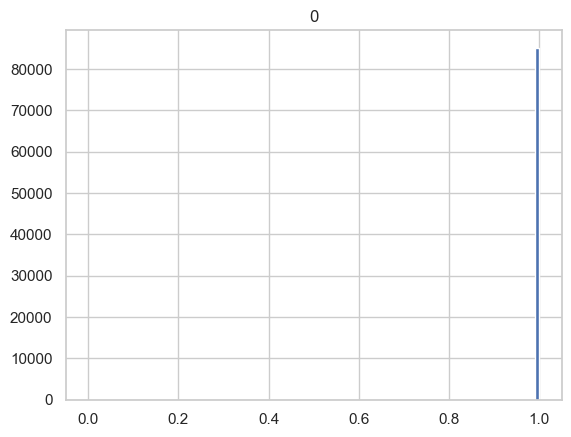

In [376]:
Probabilidad = pd.DataFrame(y_proba[:,0])
Probabilidad

In [370]:
X_test_analysis = pd.concat([X_test_reduced, Probabilidad], axis=1)
nuevo_nombre = {X_test_analysis.columns[-1]: 'Probabilidad'}
X_test_analysis = X_test_analysis.rename(columns=nuevo_nombre)

In [371]:
X_test_analysis

,V17,V12,V14,V16,V11,V10,V9,V7,Probabilidad
37886,-0.511227,0.242373,-0.294043,0.371472,-1.773098,0.393128,-0.326455,0.090441,0.999572
132613,0.882376,0.059106,-0.114061,-0.629404,1.284775,1.056562,-2.876901,-0.923854,NaN
246525,0.200896,0.069651,0.245093,-2.072045,-1.089189,0.903663,-0.661078,0.085565,NaN
208320,2.131023,-0.840155,-1.190186,0.133917,0.795651,-1.167267,-1.242712,2.961476,NaN
73410,-0.603336,0.954689,0.597423,0.186754,1.490979,0.176682,-0.295418,0.139152,0.999522
...,...,...,...,...,...,...,...,...,...
85438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999728
85439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999739
85440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999846
85441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999863


In [372]:
import pandas as pd

# Suponiendo que tienes un DataFrame df con una columna 'casos' que contiene los casos positivos y negativos
# Crea 10 rangos para acumular los casos
X_test_analysis = X_test_analysis.sort_values('Probabilidad', ascending=False)

rangos = pd.qcut(X_test_analysis['Probabilidad'], q=10, labels=False)

X_test_analysis['Rango'] = rangos

# Calcula el acumulado de casos positivos y negativos para cada rango
acumulado = df.groupby(rangos)['Class'].agg(['sum', 'count']).reset_index()

limites = X_test_analysis.groupby('Rango')['Probabilidad'].agg(['min', 'max'])

resultados_concatenados = pd.concat([acumulado, limites], axis=1)

# Renombra las columnas para mayor claridad
resultados_concatenados.columns = ['Rango', 'Total de Casos', 'Número de Casos', 'Score Min', 'Score Max']

# Muestra la tabla con el acumulado de casos

print(resultados_concatenados[:])

     Rango  Total de Casos  Número de Casos     Score Min  Score Max
0.0    0.0              25             8545  1.966575e-09   0.999252
1.0    1.0              19             8544  9.992525e-01   0.999498
2.0    2.0              25             8544  9.994978e-01   0.999610
3.0    3.0              27             8544  9.996097e-01   0.999680
4.0    4.0              12             8545  9.996797e-01   0.999732
5.0    5.0              16             8544  9.997318e-01   0.999771
6.0    6.0              19             8544  9.997715e-01   0.999807
7.0    7.0              15             8544  9.998067e-01   0.999838
8.0    8.0              18             8544  9.998377e-01   0.999874
9.0    9.0              28             8545  9.998736e-01   1.000000


# Conclusiones

In [373]:
X_test_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145276 entries, 3249 to 154472
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   V17           85443 non-null  float64
 1   V12           85443 non-null  float64
 2   V14           85443 non-null  float64
 3   V16           85443 non-null  float64
 4   V11           85443 non-null  float64
 5   V10           85443 non-null  float64
 6   V9            85443 non-null  float64
 7   V7            85443 non-null  float64
 8   Probabilidad  85443 non-null  float64
 9   Rango         85443 non-null  float64
dtypes: float64(10)
memory usage: 16.2 MB


.......................................................